# Exercise Set 15: Text Classification and Sentiment Analysis

*Morning, August 21, 2019*

In this Exercise Set you will practice using two basic text classification methods: rule- and machine learning-based. The exercise has XX parts:

1. Implement a lexical look-up method.
2. Apply pre-packaged rulebased dictionaries.
3. Train a simple baseline machine learning classifier.

In the end, you will then compare the results of these approaches.

First, load our standard stuff and import the following modules:

In [1]:
## Standard stuff:
import numpy as np, seaborn as sns, pandas as pd
## For text classification:
import nltk, nltk.sentiment, sklearn
%matplotlib inline

## Exercise 15 Part 1: Implementing your own Lexical Lookup method
There are many curated dictionaries and lexicons online for all sorts of topics (see for instance this project: https://hedonometer.org/index.html where the lexicons behind it can be downloaded here: https://github.com/andyreagan/hedonometer/blob/master/hedonometer/static/hedonometer/labMT1.txt). For this exercise we will use the following list of positive and negative words (positive:http://ptrckprry.com/course/ssd/data/negative-words.txt ; negative: http://ptrckprry.com/course/ssd/data/positive-words.txt) compilled by Hu and Liu. 

We will use the following dataset (a random sample of the trustpilot review data we collected in exercise 8) to practice on.

> **Ex. 15.1.1:**  Load it like this (remember to import the `request` package): 

```python 
# download data
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)```

The important columns are ***reviewBody*** containing the text, and the ***reviewRating_ratingValue*** containing the rating / stars.

In [2]:
# [Answer to Ex. 15.1.1]
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'

df = pd.read_csv(path2data)

> **Ex. 15.1.2:** Next, we should download and prepare the dictionaries.
1. Download the lists using python's `requests.get()`. The lists are documents of words separated by new line (which is the '\n' character). 
2. Make sure to remove the comment section in the top by splitting at the right place. 
3. `.split()` these documents into words.
4. Convert them into sets (using the `set()`-command) and assign these to two variables (e.g. ***positive*** and ***negative***). 

*Hint*: You can do all of the above in one line of code per list.

In [13]:
# [Answer to Ex. 15.1.2]

import requests,pandas as pd,numpy as np

positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split('\n')[36:-1])
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split('\n')[35:-1])

#positive = set(positive_data)
#negative = set(negative_data)

positive

{'brighter',
 'loves',
 'gainfully',
 'cherished',
 'faster',
 'merriment',
 'soulful',
 'facilitate',
 'unquestionably',
 'patience',
 'accomplish',
 'ecenomical',
 'undisputed',
 'skillful',
 'enhance',
 'resound',
 'togetherness',
 'exultingly',
 'rational',
 'well-informed',
 'admiration',
 'easiness',
 'profuse',
 'lavishly',
 'flourish',
 'upgradable',
 'ingenuously',
 'richer',
 'gains',
 'joyful',
 'cornerstone',
 'mind-blowing',
 'tougher',
 'truthfulness',
 'excels',
 'freedoms',
 'grandeur',
 'bless',
 'lovely',
 'euphoric',
 'glad',
 'awe',
 'elatedly',
 'bargain',
 'commodious',
 'willingness',
 'bliss',
 'benefit',
 'impartially',
 'adaptable',
 'fair',
 'fresher',
 'successes',
 'rock-star',
 'chivalrous',
 'thriving',
 'fondly',
 'cleanliness',
 'diligently',
 'cooperative',
 'merry',
 'exhilarate',
 'best-selling',
 'delicious',
 'gracefully',
 'reachable',
 'humourous',
 'low-risk',
 'improving',
 'supporter',
 'deserving',
 'prodigy',
 'simpler',
 'enviable',
 'appre

Now we need to prepare the trustpilot reviews, our documents to be analyzed. This means lowercasing and tokenizing them to match the format that our dictionary comes in.

> **Ex. 15.1.3:** Define a function `preprocessing(string)`, that takes in a string and returns a list of words. The function should do the following: 
1. lowercases the string using the `.lower()` command.
2. tokenize the words using the `nltk.tokenize.TweetTokenizer()` which is good for social media type user content (i.e. emojiies and more free use of punctuation and commas. 
3. return tokenized documents.

*Hint*: You can first initialize the tokenizer (outside the preprocessing function), and then you use the `.tokenize()` method.

In [7]:
# [Answer to Ex 15.1.3]
from nltk.tokenize import TweetTokenizer 

token = nltk.tokenize.TweetTokenizer()

def preprocessing(string): 
    v1 = string.lower()
    v2 = token.tokenize(v1)
    
    return v2



>**Ex 15.1.4:** Apply the preprocessing function to all the documents (i.e. our review texts in the column ***reviewBody***).

*Hint:* Use the `.apply()` method.

In [8]:
# [Answer to Ex 15.1.4]

data = df['reviewBody'].apply(preprocessing)

df['reviewBody'][0]
data.head()

0    [lots, of, inventory, ,, very, fast, and, effi...
1    [i, did, not, received, the, map, i, had, orde...
2    [after, searching, a, number, of, stores, here...
3    [website, is, not, intuitive, ., i, don't, lik...
4    [outstanding, customer, service, ,, appreciate...
Name: reviewBody, dtype: object

Now, we need to match the words in our dictionaries to the tokenized documents.
>**Ex 15.1.5:** Define a function `count_dictionary(document,dictionary)` that takes a tokenized document and a set of words (i.e. the dictionaries we loaded in Ex 15.1.2) and counts the number of matches. The function should do the following:
1. Filter the words not in the dictionary. 
*Hint*: you can use a list comprehension or for loop and `if word in` condition. 
2. Return the length of the filtered document.			

In [10]:
# [Answer Ex 15.1.5]
def count_dictionary(document, dictonary):
    filtered_doc = [x for x in document if x in dictonary]
    return len(filtered_doc)#, filtered_doc

count_dictionary(data[3],positive)

data[3]

['website',
 'is',
 'not',
 'intuitive',
 '.',
 'i',
 "don't",
 'like',
 'having',
 'to',
 'receive',
 'a',
 'complimentary',
 'magazine',
 'subscription',
 'with',
 'my',
 'order',
 '.',
 "don't",
 'force',
 'things',
 'on',
 'your',
 'customers',
 ',',
 'complimentary',
 'or',
 'not',
 '.']

>**Ex 15.1.6:** Define two new columns (***positive_liu***, ***negative_liu***) in the dataframe applying the count_dictionary function to all tokenized documents with the positive and negative set as input. 

*Hint:* the `.apply()` method allows you to input named arguments matching your `count_dictionary()` function to input the sentiment dictionary. 

In [12]:
# [Answer Ex 15.1.6]

df['positive_liu'] = data.apply(count_dictionary, dictonary = positive)
df['negative_liu'] = data.apply(count_dictionary, dictonary = negative)

df.head()

#df['reviewBody'][3]

,Unnamed: 0,__domain__,address_@type,address_addressCountry,address_addressLocality,address_postalCode,address_streetAddress,author_@type,datePublished,email,...,itemReviewed_name,meta_@type,name,reviewBody,reviewRating_@type,reviewRating_ratingValue,telephone,categories,positive_liu,negative_liu
0,159770,https://trustpilot.com/review/www.exmed.net,PostalAddress,NaN,Fenton,63026,218 Seebold Spur,Person,2017-07-29T20:27:03Z,sales@exmed.net,...,Express Medical Supply,LocalBusiness,Express Medical Supply,"Lots of inventory, very fast and efficient. I ...",Rating,5,(800) 633-2139,/health_wellbeing,3,0
1,168724,https://trustpilot.com/review/mapscompany.com,PostalAddress,NaN,"Petit-Rocher, NB",E8J 1E4,713 rue de la Mer,Person,2017-08-11T20:09:48Z,contact@mapscompany.com,...,MapsCompany,LocalBusiness,MapsCompany,I did not received the map I had ordered and p...,Rating,3,NaN,/travel_holidays,3,2
2,96443,https://trustpilot.com/review/www.thriftbooks.com,PostalAddress,NaN,Tukwila,98188,"18300 Cascade Ave S, Ste 150",Person,2015-03-19T22:59:22Z,reviews@thriftbooks.com,...,Thrift Books,LocalBusiness,Thrift Books,After searching a number of stores here in my ...,Rating,5,253-275-2251,/entertainment,5,0
3,173433,https://trustpilot.com/review/fabletics.com,PostalAddress,NaN,NaN,NaN,NaN,Person,2017-04-30T19:47:39Z,NaN,...,Fabletics,LocalBusiness,Fabletics,Website is not intuitive. I don't like having...,Rating,2,855-202-3570,/clothes_fashion,4,0
4,138968,https://trustpilot.com/review/www.enterprise.com,PostalAddress,US,St Louis,63105,600 Corporate Park Dr,Person,2018-05-26T20:43:41Z,NaN,...,Enterprise,LocalBusiness,Enterprise,"Outstanding customer service, appreciated the ...",Rating,5,NaN,/transportation,3,0


> **Ex 15.1.7 (BONUS):** Define your own set of words and use the count_dictionary function to match them (remember that they need to be lowercased to match).

In [90]:
# [Answer Ex 15.1.7]

### Exercise 15 Part 2: Applying prepackaged rulebased dictionaries and comparison of results
In the following exercise you will apply two prepackaged dictionaries which are also rulebased. One is MIT's VADER method (https://github.com/cjhutto/vaderSentiment) which is builtin to the NLTK package, and the Finn Aarups (DTU) AFINN sentiment analyzer, which has the advantage of working on danish text. 


>**Ex 15.2.1:** Apply VADER: Define a four new columns using output from the VADER sentiment analyzer 
1. Import the `nltk`, `nltk.sentiment` package and download the vader_lexicon using `nltk.download('vader_lexicon')`.
2. Initialize the the vader sentiment analyzer: nltk.sentiment.vader.SentimentIntensityAnalyzer()
3. Apply the `.polarity_scores` function to all documents. This function should be provided with a string. So, you do not need to tokenize the documents, but instead you can just use the ***reviewBody*** column of your dataframe.
4. Convert the resulting Series of dictionaries (Vader outputs dictionaries of 4 scores) to a dataframe by first converting the Series into a list using the `list()` function, and then the `pd.DataFrame()` function.
5. Rename the columns adding vader_ as prefix.
6. Merge with original Dataframe. 

*Hint:* Use `pd.concat([df,df2],axis=1)` 


In [91]:
# [Answer Ex 15.2.1]
nltk.download('vader_lexicon')

vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()

data_vader = df['reviewBody'].apply(vader.polarity_scores)

df[['vader_compound','vader_neg','vader_neu','vader_pos']] = pd.DataFrame(list(data_vader))

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/josefinebjornholm/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,__domain__,address_@type,address_addressCountry,address_addressLocality,address_postalCode,address_streetAddress,author_@type,datePublished,email,...,telephone,categories,positive_liu,negative_liu,vader_compund,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score
0,159770,https://trustpilot.com/review/www.exmed.net,PostalAddress,NaN,Fenton,63026,218 Seebold Spur,Person,2017-07-29T20:27:03Z,sales@exmed.net,...,(800) 633-2139,/health_wellbeing,3,0,0.6771,0.000,0.618,0.382,0.6771,2.0
1,168724,https://trustpilot.com/review/mapscompany.com,PostalAddress,NaN,"Petit-Rocher, NB",E8J 1E4,713 rue de la Mer,Person,2017-08-11T20:09:48Z,contact@mapscompany.com,...,NaN,/travel_holidays,3,2,0.8836,0.058,0.783,0.158,0.8836,6.0
2,96443,https://trustpilot.com/review/www.thriftbooks.com,PostalAddress,NaN,Tukwila,98188,"18300 Cascade Ave S, Ste 150",Person,2015-03-19T22:59:22Z,reviews@thriftbooks.com,...,253-275-2251,/entertainment,5,0,0.6124,0.000,0.882,0.118,0.6124,5.0
3,173433,https://trustpilot.com/review/fabletics.com,PostalAddress,NaN,NaN,NaN,NaN,Person,2017-04-30T19:47:39Z,NaN,...,855-202-3570,/clothes_fashion,4,0,0.7664,0.000,0.734,0.266,0.7664,2.0
4,138968,https://trustpilot.com/review/www.enterprise.com,PostalAddress,US,St Louis,63105,600 Corporate Park Dr,Person,2018-05-26T20:43:41Z,NaN,...,NaN,/transportation,3,0,0.8977,0.000,0.479,0.521,0.8977,10.0


>**Ex 15.2.2:** Install the AFINN package: `pip install afinn`. Read how to apply the afinn package here (https://github.com/fnielsen/afinn) and define a column called afinn. 

*Hint:* As VADER's `polarity_score`, AFINN should be provided with a string and not the tokenized documents.

In [64]:
# [Answer Ex 15.2.2]
from afinn import Afinn
afinn = Afinn()

df['afinn_score'] = df['reviewBody'].apply(afinn.score)


>**Ex 15.2.3:** Plot all the different dictionary and rulebased sentiment analysis columns against each other using the seaborn plotting function `sns.pairplot`. Set the color (i.e. hue argument as the number of stars in the `reviewRating_ratingValue` column). 

*Hint:* To plot, work with a smaller dataframe. You shoul select only the relevant columns, i.e. the ones with the sentiment analysis results and the star rating column. Moreover, you can downsample the dataframe to 1000 rows using the `.sample()` method.


/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/josefinebjornholm/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


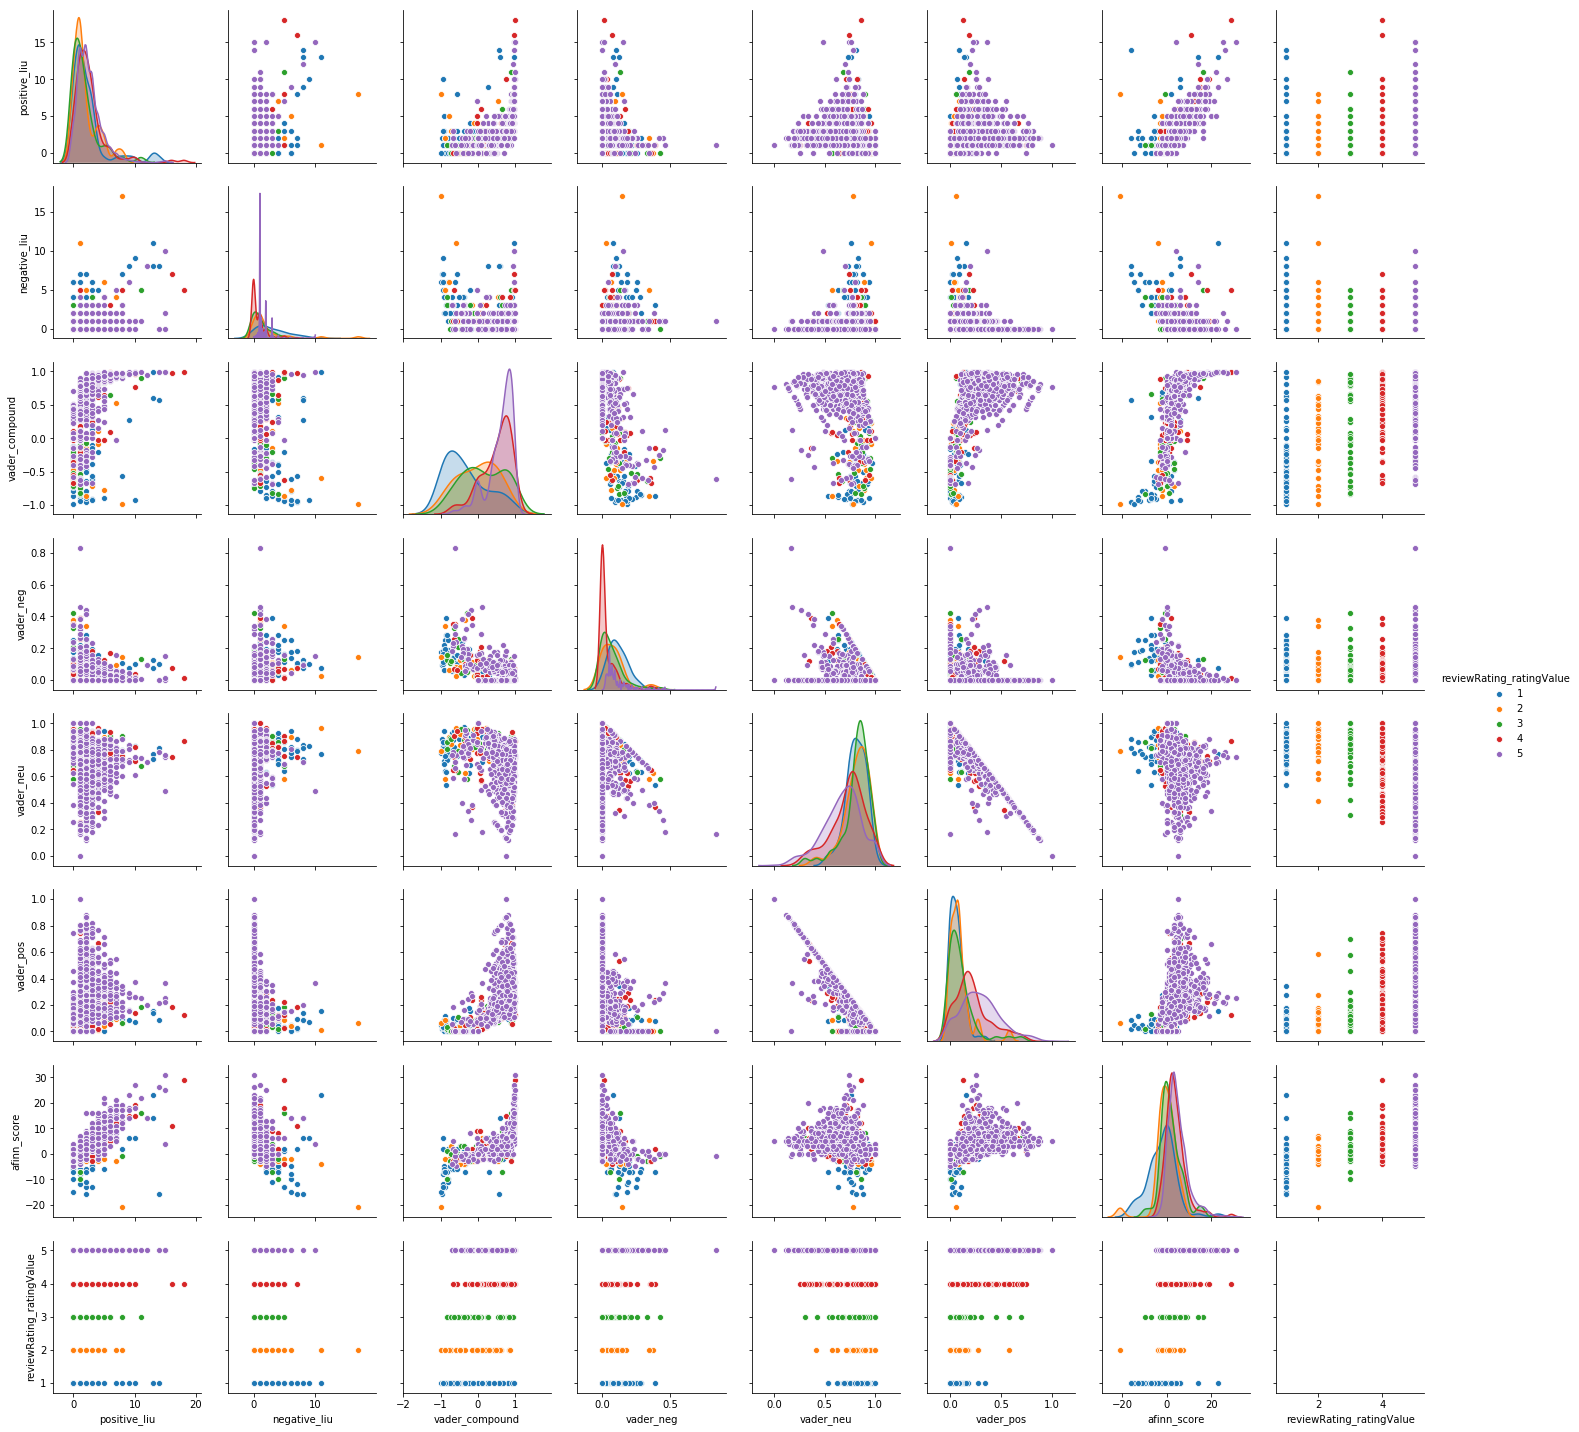

In [69]:
# [Answer Ex 15.2.3]
df_new = df[['positive_liu','negative_liu','vader_compound','vader_neg','vader_neu','vader_pos','afinn_score','reviewRating_ratingValue']].sample(1000)

sns.pairplot(df_new, hue = 'reviewRating_ratingValue')


>**Ex 15.2.4:** Inspect a document where the LIU and VADER dictionaries disagree. More specifically, look at documents where the LIU lexicon is positive and the VADER is negative. For that, you should filter on positive expressions by LIU, and sample in the most negative according to the VADER. Try to explain the disagreement in terms of simple matches versus negations. 

*Hint*: Pick a document and see which words the LIU lexicon has matched using python set notation: e.g. 

```python 
# overlap between two sets
set(documents[0])&positive
```

In [126]:
# [Answer Ex 15.2.4]
set(data[3])&positive

#df_filtered = df['positive_liu']>0.c3

#type(df_filtered)

df_filtered =df.drop(df[df.positive_liu ==0].index)
df_filtered_sorted= df_filtered.sort_values(by=['vader_compound'],ascending=True)

set(data[7682])&positive

df_filtered_sorted.head()

,Unnamed: 0,__domain__,address_@type,address_addressCountry,address_addressLocality,address_postalCode,address_streetAddress,author_@type,datePublished,email,...,telephone,categories,positive_liu,negative_liu,vader_compund,vader_neg,vader_neu,vader_pos,vader_compound,afinn_score
8116,174556,https://trustpilot.com/review/avasflowers.net,PostalAddress,US,Mahwah,07430,300 Corporate Drive,Person,2016-10-10T19:40:19Z,contact@avasflowers.com,...,877-638-3303,/home_garden,12,23,-0.9973,0.137,0.812,0.051,-0.9973,-44.0
5486,124697,https://trustpilot.com/review/www.viator.com,PostalAddress,US,San Francisco,94107,360 3rd St #400,Person,2016-11-15T02:13:00Z,support@viator.com,...,888-651-9785,/travel_holidays,5,19,-0.9971,0.130,0.848,0.023,-0.9971,-31.0
1005,131137,https://trustpilot.com/review/www.edreams.com,PostalAddress,NaN,NaN,NaN,NaN,Person,2018-07-30T16:55:59Z,NaN,...,NaN,/travel_holidays,3,12,-0.9949,0.137,0.842,0.022,-0.9949,-21.0
9903,134936,https://trustpilot.com/review/www.agoda.com,PostalAddress,NaN,NaN,NaN,NaN,Person,2015-05-19T14:20:57Z,NaN,...,NaN,/travel_holidays,6,20,-0.9906,0.199,0.713,0.088,-0.9906,-34.0
3032,63428,https://trustpilot.com/review/www.makemytrip.com,PostalAddress,US,NaN,NaN,NaN,Person,2017-10-30T11:22:04Z,NaN,...,NaN,/travel_holidays,4,10,-0.9900,0.255,0.710,0.035,-0.9900,-12.0


## Exercise 15 Part 3: Train a classifier to score the reviews and compare results
In following exercise you will implement a simple text classifier based on the logistic regression trained on the ratings. We will walk through the standard procedures of Supervised Learning - i.e. parameter search and crossvalidation - but first we need to transform our documents into feature vectors. Here, we will use the sklearn function `sklearn.feature_extraction.text.CountVectorizer`. This module will transform the documents into BoWs (bag of words), using words counts and combinations of words (i.e. ngram) as columns.

> **Ex 15.3.1:** Make a train-test (50-50) split before applying any transformation to avoid *data leakage* and to set up a clean hyperparameter search using the train set, and saving the test set for crossvalidation. 

*Hint:* Use `sklearn.model_selection.train_test_split`.


In [138]:
#[Answer Ex 15.3.1]
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

y = df['reviewRating_ratingValue']
X = df['reviewBody']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/2, random_state=0)



> **Ex 15.3.2:** Preproce the documents as in Ex 15.1.3. Then, initialize the `sklearn.feature_extraction.text.CountVectorizer`. 
The countvectorizer has many possible inputs: The important ones here are the tokenization function (use the one defined above, i.e. `tokenizer=tokenizer.tokenize`) and `ngram_range=(1,2)`. Finally, run the `.fit()` function with the train documents as input.

In [26]:
#[Answer Ex 15.3.2]

> **Ex 15.3.3:** Transform train and test documents to a sparse vector using the `transform` command on both the test and the train documents. Assign these to two variables, e.g. `X_train` and `X_test`. Afterwards, inspect the resulting dimensions of each input vector using the `.shape` function.

In [28]:
#[Answer Ex 15.3.3]

> **Ex 15.3.4:** Convert ratings to binary outcome. Here we make a decision to count ratings as positive if above 3 and otherwise negative. Define ***y_train*** and ***y_test*** as a binary variables expressing whether it is higher than 3 or not.

In [30]:
#[Answer Ex 15.3.4]

Now we are ready to train our model. We will use the penalized logistic regression which is widely used for training baseline in within natural language processing (NLP) - especially with a little twist see [Wang and Manning 2012](https://www.aclweb.org/anthology/P12-2018). 
As always we should we remember to do our parameter search using the training data only.

> **Ex 15.3.5:** In this case we will do only a search over the penalizationterm C and, therefore, we can use the `sklearn.linear_model.LogisticRegressionCV()` which handles kfold-based parameter search directly. The function takes as arguments the range of values to be searched and the number of folds used for cross-validation.

*Hint:* You can use a `LogisticRegressionCV()` with the arguments `Cs=np.linspace(0.1,2,10)`,`cv=10` and `verbose=2`. You can vary these arguments if you want.

In [32]:
# [Answer Ex 15.3.5]

> **Ex 15.3.6:** Report the performance of the classifier. You should report the accuracy. Additionally, you might want to report precision, recall, f1, AUC and roc-auc-curve.

*Hint:* These measures can be computed using the `sklearn.metrics` package. You might want to define a function that takes your classifier and data as input and returns the metrics.

In [ ]:
# [Answer Ex 15.3.6]

> **Ex 15.3.7:** Create a column in the dataframe applying the classifier to all documents.
1. First transform documents using vectorizer from before. 
2. Get the predicted probability of a positive review: `clf.predict_proba(X)`. Note that you only need the second column - it predicts probabilities for both classes 0 and 1.

In [35]:
# [Answer Ex 15.3.7]

>**Ex 15.3.8 (BONUS):** Compute the correlation of the computed sentiment with the given rating for all three methods. Would you expect a positive or a negative correlation? Note that there are different categories describing the ratings' subjects (see the ***categories*** column). You can compute the correlation averaging the ratings and the sentiment scores over these categories.

In [ ]:
# [Answer Ex 15.3.8 (BONUS)]